<a href="https://colab.research.google.com/github/tomeliud/Naive-Bayes-and-KNN-modeling-/blob/master/KNN_Moringa_Core_Tom_Njoroge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application of K Nearest Neighbour on Titanic Dataset

## a). Defining the question 

Building a model that determines whether or not a passenger who was in the Titanic Ship survived based on various details such as sex, age, cabin, etc

## b). Defining the Metric for Success

Been able to build a model that can determine whether a passenger of the Titanic Ship was able to survive

## c). Recording experimental desgin 


Loading the Dataset

Data Cleaning

EDA

Modelling and Evaluation 

# 2. Reading the data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
test = pd.read_csv('test (1).csv')
train = pd.read_csv('train (5).csv')

## 3. Checking the data 

In [3]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
test.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#size 
print(f'The train dataset has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'The test dataset has {test.shape[0]} rows and {test.shape[1]} columns')

The train dataset has 891 rows and 12 columns
The test dataset has 418 rows and 11 columns


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Tydying the dataset 

In [14]:
#checking for duplicates 
test.duplicated().any()

False

In [15]:
train.duplicated().any()

False

In [13]:
#checking for null values 
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [16]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [17]:
#droping irrelevant columns 
train.drop(['PassengerId','Name','Ticket','Cabin'],1, inplace=True)

In [18]:
#ensuring uniformity of columns 
train.columns = train.columns.str.lower()

In [19]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

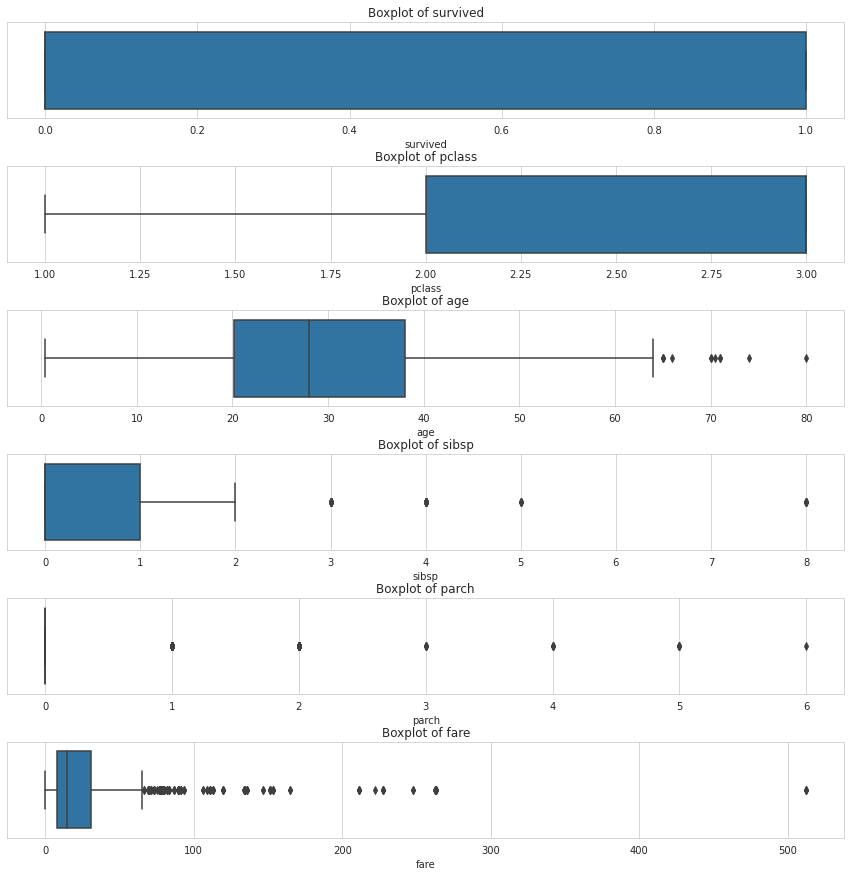

In [23]:
#checking for outliers 
num_col = ['survived','pclass','age','sibsp','parch','fare']

fig,ax = plt.subplots(len(num_col), figsize=(15,15))
sns.set_style('whitegrid')

for i, col in enumerate(num_col):
  sns.boxplot(train[col], ax=ax[i])
  ax[i].set_title("Boxplot of {}".format(col))

plt.subplots_adjust(hspace=0.5)

In [26]:
#saving our cleaned dataset 
train.to_csv('titanic.csv')

# EDA

### Univariate analysis 

In [27]:
df = pd.read_csv('titanic.csv')
df.drop('Unnamed: 0',1,inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


([<matplotlib.axis.XTick at 0x7fa4250de630>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

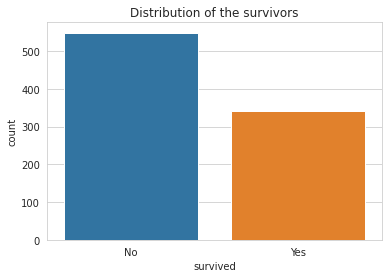

In [29]:
# B#ar plot to represent surviors 
#0 rep No of people who did not survive while 1 rep the number of people who survived  
sns.countplot(df['survived'])
plt.title('Distribution of the survivors')
plt.xticks(ticks=[0,1], labels=['No','Yes'])

Text(0.5, 1.0, 'Age')

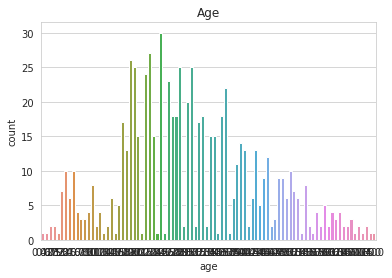

In [42]:
sns.countplot(df['age'])
plt.title('Age')

([<matplotlib.axis.XTick at 0x7fa423c3a048>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

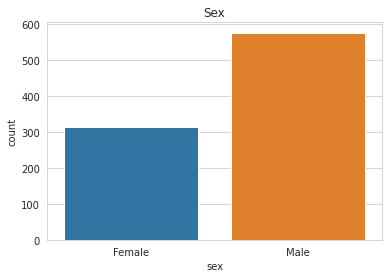

In [49]:
#plot showing relationship of female and male 
sns.countplot(df['sex'])
plt.title('Sex')
plt.xticks(ticks=[0,1], labels=['Female','Male'])

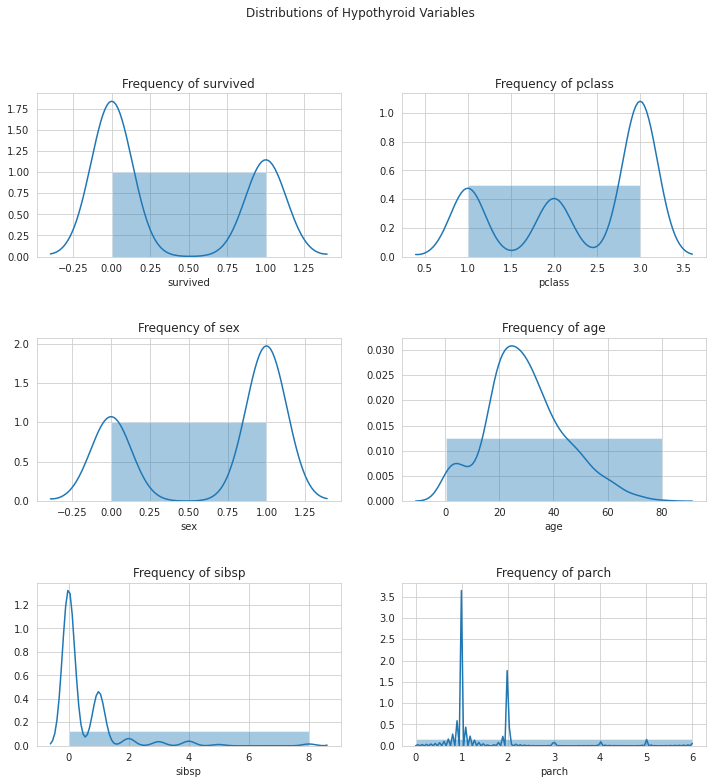

In [50]:
# Frequency distribution

fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (12,12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Hypothyroid Variables')

for ax, values, name in zip(axes.flatten(), df.values.T, df.columns):
    sns.distplot(values, ax=ax, bins=len(np.unique(df.values.T[1]))//2)
    ax.set(title="Frequency of {}".format(name), xlabel=name)

### Bivariate analysis 

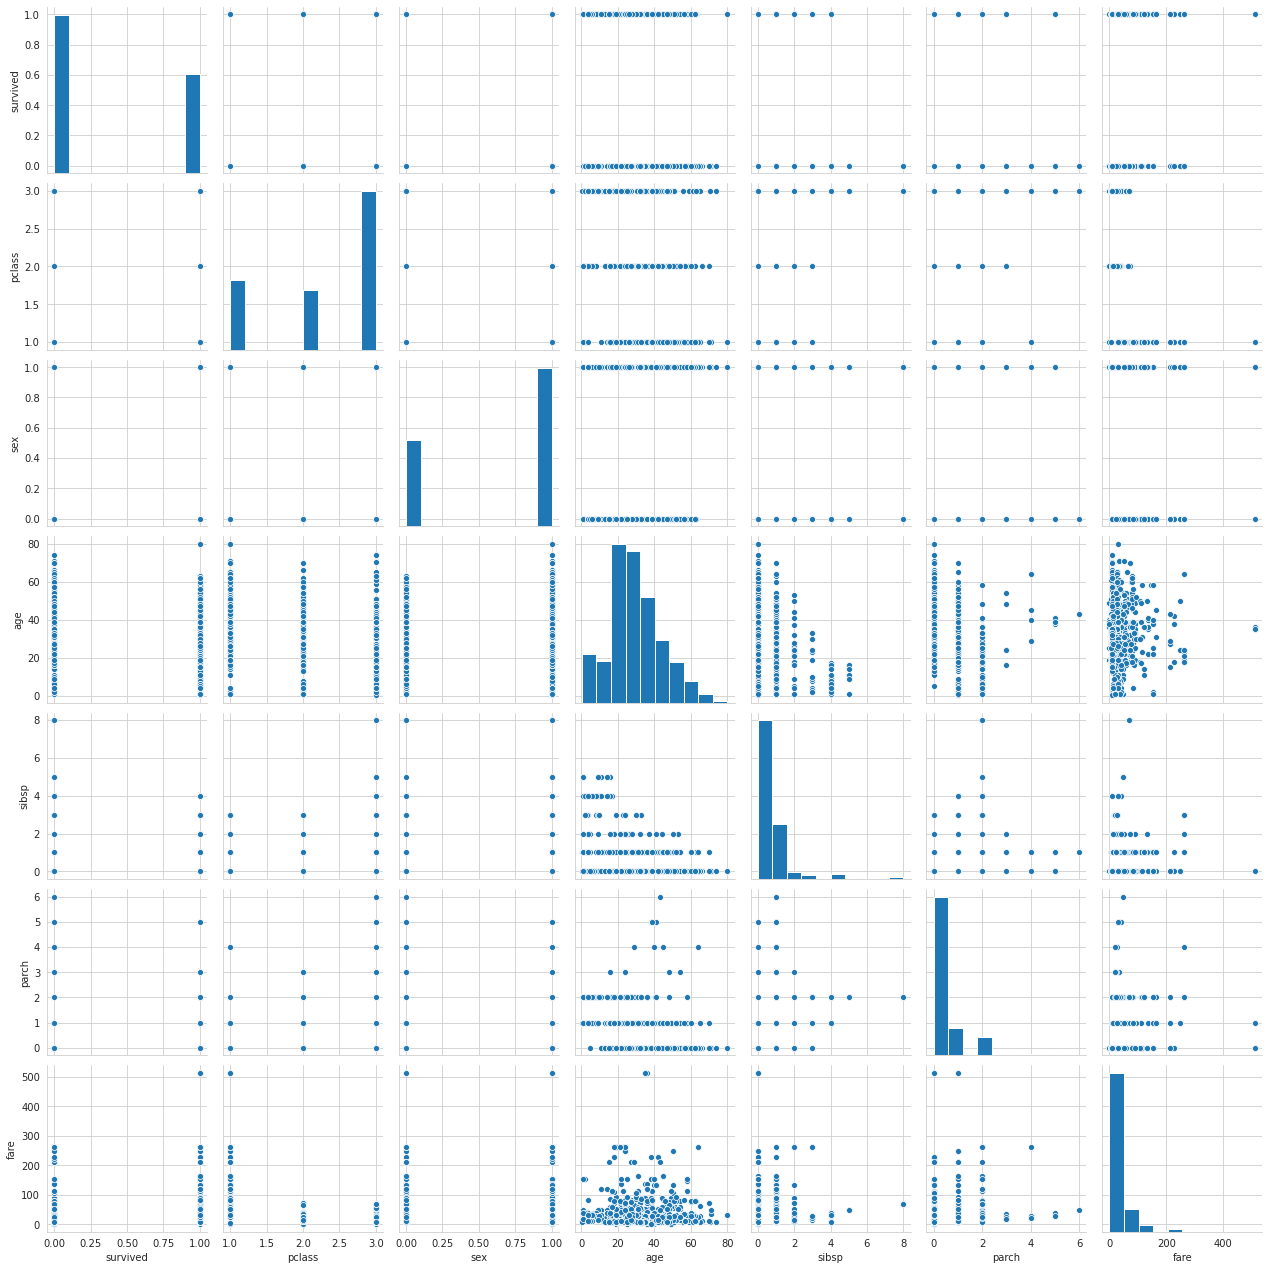

In [51]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation between variables')

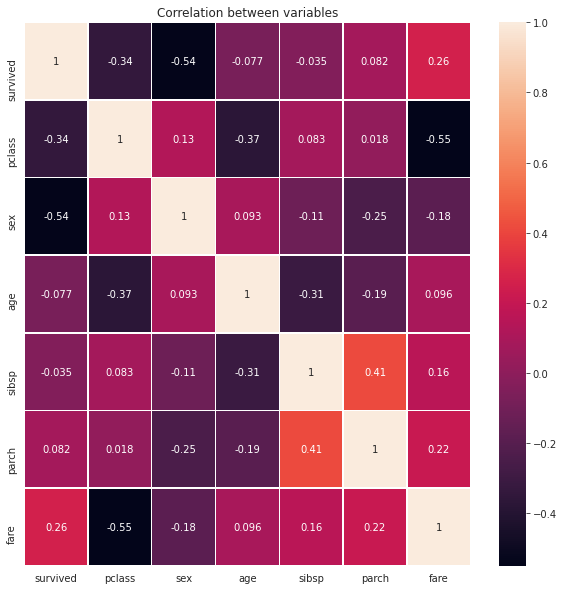

In [53]:
#Heatmap showing variables correlation 
corrMatrix = df.corr()
corrMatrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)
plt.title('Correlation between variables')

# Implementing the solution 

KNN

In [65]:
#Split Features and Label into train and test
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y = df['survived']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=50)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

#Make Prediction
from sklearn.metrics import confusion_matrix, classification_report
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[89 12]
 [28 50]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       101
           1       0.81      0.64      0.71        78

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



Spliting into dataset 70 30 train and test size  

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=50)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

#Make Prediction
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[143  19]
 [ 34  72]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       162
           1       0.79      0.68      0.73       106

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



split 60 40 

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=50)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

#Make Prediction
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[199  19]
 [ 56  83]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       218
           1       0.81      0.60      0.69       139

    accuracy                           0.79       357
   macro avg       0.80      0.75      0.77       357
weighted avg       0.79      0.79      0.78       357



A conclusion can be made that

> With the Split of Training Data and testing data at 80 - 20, we get an accuracy of 78%

> With the Split of Training Data and testing data at 70 - 30, we get an accuracy of 80%

> With the Split of Training Data and testing data at 60 - 40, we get an accuracy of 79%







Using an alternative model LDA

In [72]:
#Split Features and Label into train and test
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = df.iloc[:,1:]
y = df['survived']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Perform LDA
lda = LDA()
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

#Fit the Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

#Make Prediction
y_pred = knn.predict(X_test)

#Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[86 24]
 [17 52]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       110
           1       0.68      0.75      0.72        69

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179



A conclusion cane be made that the KNN is more accuraate since it accuracy level was above 78% which is the accuracy model of the LDA model 